# Importing libraries

In [1]:
import sklearn
from matplotlib import pyplot as plt
import numpy as np
import scipy
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# Data Preprocessing

In [2]:
data = pd.read_csv("winequality-red.csv", sep=';')
data['class'] = -1
data.loc[data.quality >= 6, 'class'] = 1
features, labels = data.drop(['class', 'quality'], axis = 1), data['class']
n_obj = features.shape[0]

In [3]:
t_ind = int(n_obj * 0.6)
x_train = features[:t_ind]
y_train = labels[:t_ind]
x_test = features[t_ind:]
y_test = labels[t_ind:]

# Part 1

In [4]:
def scores_svm(kernel):
    model = SVC(kernel = kernel, degree=2).fit(x_train, y_train)
    scores = model.decision_function(x_test)
    n_svec = len(model.support_)
    return scores, n_svec

In [5]:
kernels = ['linear', 'poly', 'rbf']

/Users/gasanoe/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gasanoe/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


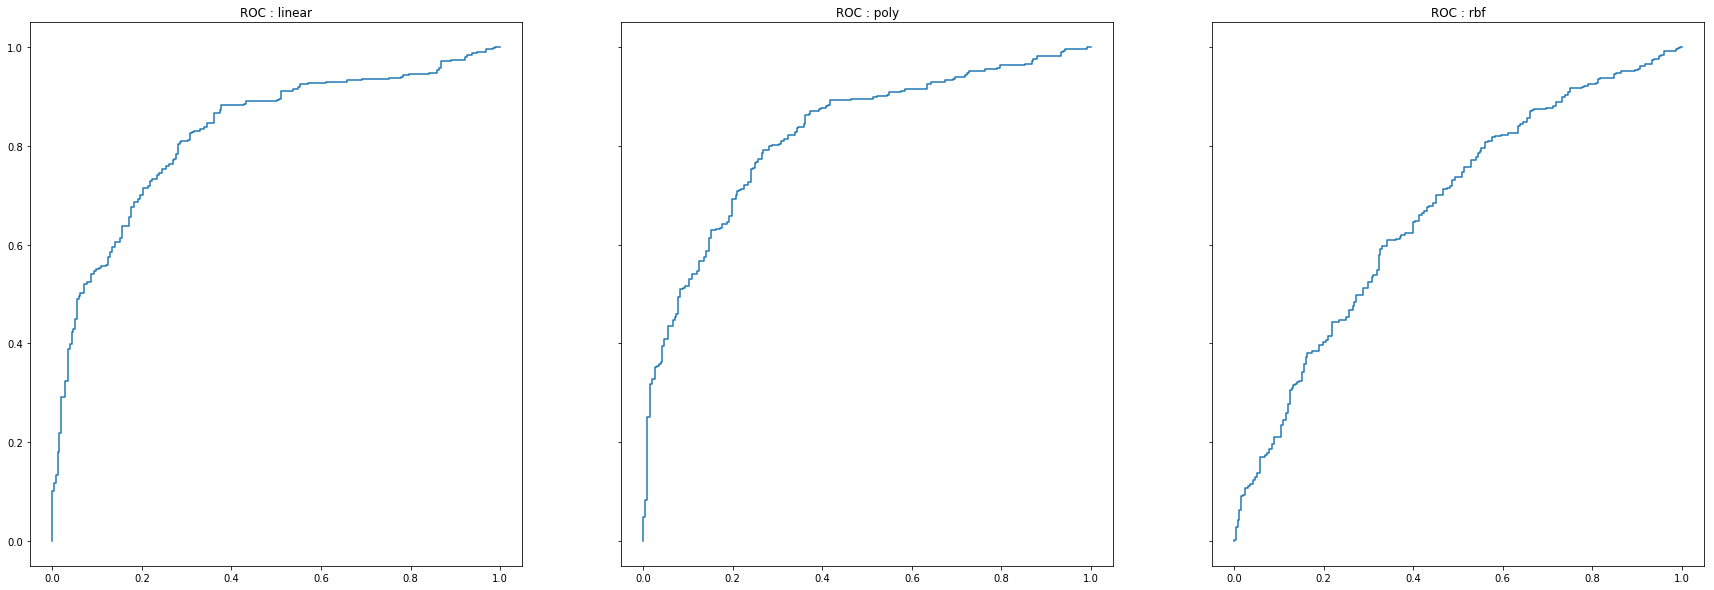

In [6]:
n = 0
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (30, 10))
n_svecs = dict()
auc_roc = dict()
for kernel in kernels:
    scores, n_svecs[kernel] = scores_svm(kernel)
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, scores)
    auc_roc[kernel] = sklearn.metrics.roc_auc_score(y_test, scores)
    ax[n].set_title("ROC : {}".format(kernel))
    ax[n].plot(fpr, tpr)
    n += 1
plt.savefig("ROC.pdf")

In [7]:
auc_roc

{'linear': 0.8233991323871545,
 'poly': 0.8206459347156891,
 'rbf': 0.666497343316638}

In [8]:
n_svecs

{'linear': 598, 'poly': 554, 'rbf': 800}

# Part 2

## Defining possible values of parameters 

In [9]:
Cs = [0.05, 0.1, 0.15, 0.2]
gammas = ['scale', 0.001, 0.002]
degrees = [2, 3, 4]
coef0s = [0, 0.5, 1, 1.5, 2, 2.5]

## Linear kernel

In [10]:
kf = KFold(n_splits=5)

In [11]:
# kf.get_n_splits(features)
av_scores_linear = dict()

for C in Cs:    
    scores_linear = []
    for train_index, test_index in kf.split(features):
        X_train_k, X_test_k = features.loc[train_index], features.loc[test_index]
        y_train_k, y_test_k = labels[train_index], labels[test_index]
        model = SVC(kernel = 'linear', C=C).fit(X_train_k, y_train_k)
        scores = model.decision_function(X_test_k)
        scores_linear.append(sklearn.metrics.roc_auc_score(y_test_k, scores))
    av_scores_linear[C] = np.mean(np.array(scores_linear))

In [12]:
av_scores_linear

{0.05: 0.7872610629157426,
 0.1: 0.7921952731788175,
 0.15: 0.7923900612598491,
 0.2: 0.7931301420681582}

In [34]:
min(av_scores_linear, key=av_scores_linear.get)

0.05

In [40]:
model_l = SVC(kernel = 'linear', C=0.5).fit(x_train, y_train)
scores_l = model_l.decision_function(x_test)
auc_roc_l = sklearn.metrics.roc_auc_score(y_test, scores_l)
print("auc_roc = ", auc_roc_l)
print("n_svms = ", len(model_l.support_))

auc_roc =  0.8218650628358953
n_svms =  604


## Polynomial kernel

In [13]:
av_scores_poly = dict()

In [14]:
for C in Cs:
    for gamma in gammas:
        for coef0 in coef0s:
            for degree in degrees:
                scores_ = []
                for train_index, test_index in kf.split(features):
                    X_train_k, X_test_k = features.loc[train_index], features.loc[test_index]
                    y_train_k, y_test_k = labels[train_index], labels[test_index]
                    model = SVC(kernel = 'poly', C=C, gamma=gamma, coef0=coef0, degree=degree).fit(X_train_k, y_train_k)
                    scores = model.decision_function(X_test_k)
                    scores_.append(sklearn.metrics.roc_auc_score(y_test_k, scores))
                print(C, gamma, coef0, degree)
                av_scores_poly[(C, gamma, coef0, degree)] = np.mean(np.array(scores_))

0.05 scale 0 2
0.05 scale 0 3
0.05 scale 0 4
0.05 scale 0.5 2
0.05 scale 0.5 3
0.05 scale 0.5 4
0.05 scale 1 2
0.05 scale 1 3
0.05 scale 1 4
0.05 scale 1.5 2
0.05 scale 1.5 3
0.05 scale 1.5 4
0.05 scale 2 2
0.05 scale 2 3
0.05 scale 2 4
0.05 scale 2.5 2
0.05 scale 2.5 3
0.05 scale 2.5 4
0.05 0.001 0 2
0.05 0.001 0 3
0.05 0.001 0 4
0.05 0.001 0.5 2
0.05 0.001 0.5 3
0.05 0.001 0.5 4
0.05 0.001 1 2
0.05 0.001 1 3
0.05 0.001 1 4
0.05 0.001 1.5 2
0.05 0.001 1.5 3
0.05 0.001 1.5 4
0.05 0.001 2 2
0.05 0.001 2 3
0.05 0.001 2 4
0.05 0.001 2.5 2
0.05 0.001 2.5 3
0.05 0.001 2.5 4
0.05 0.002 0 2
0.05 0.002 0 3
0.05 0.002 0 4
0.05 0.002 0.5 2
0.05 0.002 0.5 3
0.05 0.002 0.5 4
0.05 0.002 1 2
0.05 0.002 1 3
0.05 0.002 1 4
0.05 0.002 1.5 2
0.05 0.002 1.5 3
0.05 0.002 1.5 4
0.05 0.002 2 2
0.05 0.002 2 3
0.05 0.002 2 4
0.05 0.002 2.5 2
0.05 0.002 2.5 3
0.05 0.002 2.5 4
0.1 scale 0 2
0.1 scale 0 3
0.1 scale 0 4
0.1 scale 0.5 2
0.1 scale 0.5 3
0.1 scale 0.5 4
0.1 scale 1 2
0.1 scale 1 3
0.1 scale 1 4
0.1 

In [15]:
av_scores_poly

{(0.05, 'scale', 0, 2): 0.6432106716435179,
 (0.05, 'scale', 0, 3): 0.6203515837400793,
 (0.05, 'scale', 0, 4): 0.6286689770048526,
 (0.05, 'scale', 0.5, 2): 0.6477077891167322,
 (0.05, 'scale', 0.5, 3): 0.6584577963198803,
 (0.05, 'scale', 0.5, 4): 0.6844083046797491,
 (0.05, 'scale', 1, 2): 0.6523961671199667,
 (0.05, 'scale', 1, 3): 0.6774163357482623,
 (0.05, 'scale', 1, 4): 0.7085771375664631,
 (0.05, 'scale', 1.5, 2): 0.656220518371482,
 (0.05, 'scale', 1.5, 3): 0.6908676939166379,
 (0.05, 'scale', 1.5, 4): 0.7245735528438738,
 (0.05, 'scale', 2, 2): 0.6598695352636105,
 (0.05, 'scale', 2, 3): 0.7038531438489914,
 (0.05, 'scale', 2, 4): 0.7400475776740238,
 (0.05, 'scale', 2.5, 2): 0.6625095266960901,
 (0.05, 'scale', 2.5, 3): 0.7146718505140068,
 (0.05, 'scale', 2.5, 4): 0.75433017424747,
 (0.05, 0.001, 0, 2): 0.6932082753537678,
 (0.05, 0.001, 0, 3): 0.7058182156528471,
 (0.05, 0.001, 0, 4): 0.7141171947030402,
 (0.05, 0.001, 0.5, 2): 0.6915594578899746,
 (0.05, 0.001, 0.5, 3):

In [18]:
min(av_scores_poly, key=av_scores_poly.get)

(0.05, 'scale', 0, 3)

In [42]:
model_poly = SVC(kernel = 'poly', C=0.05, gamma='scale', coef0=0, degree=3).fit(x_train, y_train)
scores_poly = model_poly.decision_function(x_test)
auc_roc_poly = sklearn.metrics.roc_auc_score(y_test, scores_poly)
print("auc_roc = ", auc_roc_poly)
print("n_svms = ", len(model_poly.support_))

auc_roc =  0.6159441639320945
n_svms =  808


## RBF kernel

In [29]:
av_scores_rbf = dict()

In [30]:
for C in Cs:
    for gamma in gammas:
        scores_ = []
        for train_index, test_index in kf.split(features):
            X_train_k, X_test_k = features.loc[train_index], features.loc[test_index]
            y_train_k, y_test_k = labels[train_index], labels[test_index]
            model = SVC(kernel = 'poly', C=C, gamma=gamma, coef0=coef0, degree=degree).fit(X_train_k, y_train_k)
            scores = model.decision_function(X_test_k)
            scores_.append(sklearn.metrics.roc_auc_score(y_test_k, scores))
        av_scores_rbf[(C, gamma)] = np.mean(np.array(scores_))

In [31]:
av_scores_rbf

{(0.05, 'scale'): 0.75433017424747,
 (0.05, 0.001): 0.7763461667217116,
 (0.05, 0.002): 0.7756423583517884,
 (0.1, 'scale'): 0.7677548843315355,
 (0.1, 0.001): 0.775228688705602,
 (0.1, 0.002): 0.7816303269876681,
 (0.15, 'scale'): 0.7718726178897639,
 (0.15, 0.001): 0.778347013167544,
 (0.15, 0.002): 0.784139808939772,
 (0.2, 'scale'): 0.775603845812158,
 (0.2, 0.001): 0.7797321562913011,
 (0.2, 0.002): 0.7864612001493765}

In [32]:
min(av_scores_rbf, key=av_scores_rbf.get)

(0.05, 'scale')

In [43]:
model_rbf = SVC(kernel = 'rbf', C=0.05, gamma='scale').fit(x_train, y_train)
scores_rbf = model_rbf.decision_function(x_test)
auc_roc_rbf = sklearn.metrics.roc_auc_score(y_test, scores_rbf)
print("auc_roc = ", auc_roc_rbf)
print("n_svms = ", len(model_rbf.support_))

auc_roc =  0.6001462953744247
n_svms =  830


## ROC curves

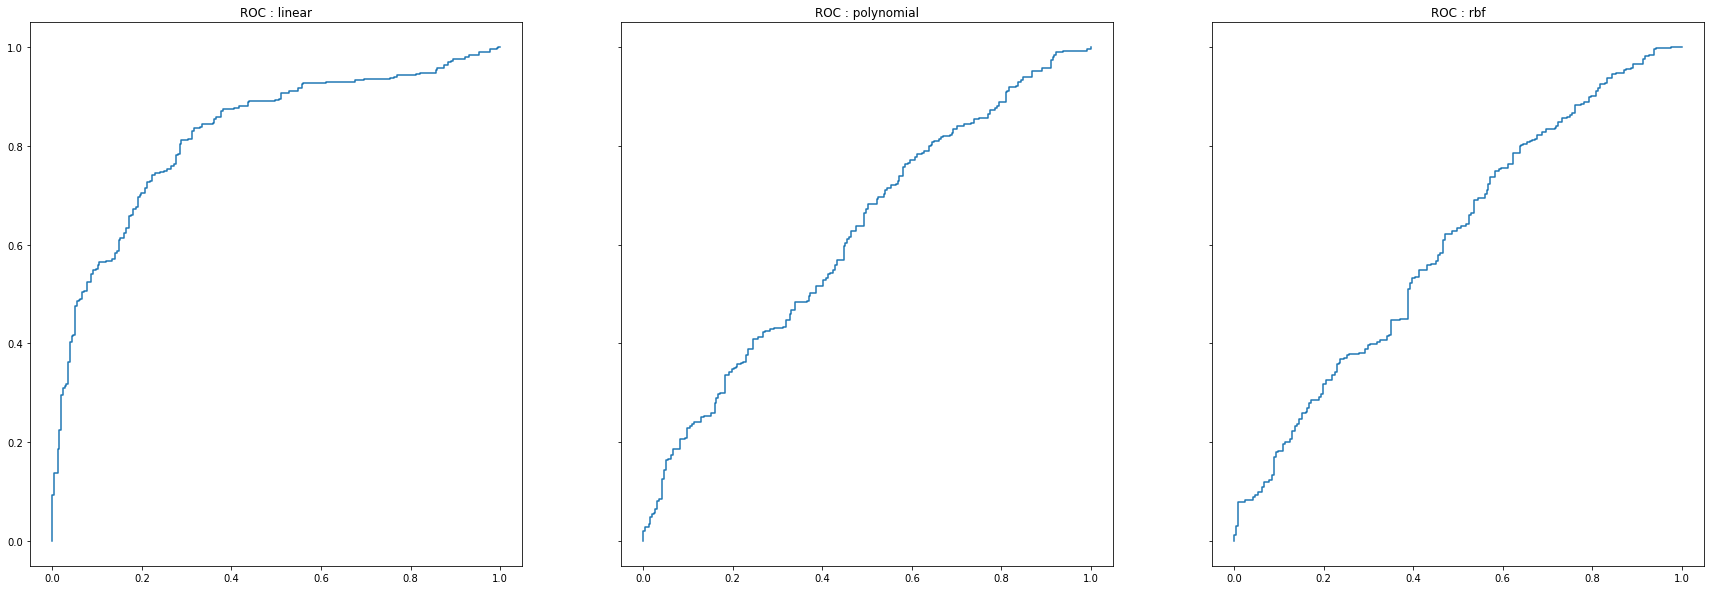

In [44]:
n = 0
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (30, 10))
fpr_l, tpr_l, _ = sklearn.metrics.roc_curve(y_test, scores_l)
fpr_poly, tpr_poly, _ = sklearn.metrics.roc_curve(y_test, scores_poly)
fpr_rbf, tpr_rbf, _ = sklearn.metrics.roc_curve(y_test, scores_rbf)
ax[0].set_title("ROC : linear")
ax[0].plot(fpr_l, tpr_l)
ax[1].set_title("ROC : polynomial")
ax[1].plot(fpr_poly, tpr_poly)
ax[2].set_title("ROC : rbf")
ax[2].plot(fpr_rbf, tpr_rbf)
plt.savefig("ROC_kfold.pdf")